In [1]:
# this is a comment

"""this is a multiple
line comment"""

'this is a multiple\nline comment'

In [2]:
# ============================================
# Variables Example
int_val = 8
long_val = 23423423235
float_val = 2.0
bool_val = True

print ("Variable type examples:")
print (type(int_val))
print (type(long_val))
print (type(float_val))
print (type(bool_val))

Variable type examples:
<class 'int'>
<class 'int'>
<class 'float'>
<class 'bool'>


In [3]:
#============================================
# Arithmetic and casting
print ("\nArithmetic examples:")
print (8 / 3)
print (float(8) / 3)
print (float(8) / float(3))

print (True and False)
print (8 == 3)


Arithmetic examples:
2.6666666666666665
2.6666666666666665
2.6666666666666665
False
False


In [4]:
#============================================
# string example
print ("\nString example:")
str_val = "A string is double or single quotes"
str_val_long = '''Three quote means that the string goes over
multiple lines'''
str_val_no_newline = '''This also spans multiple lines \
but has no newline'''

print (str_val)
print (str_val_long)
print (str_val_no_newline)


String example:
A string is double or single quotes
Three quote means that the string goes over
multiple lines
This also spans multiple lines but has no newline


In [5]:
#============================================
# for loop example with list
print ("\nfor loop output:")

list_example = [int_val, long_val, float_val, bool_val]
list_example.insert(0, "UbiComp")

for val in list_example:
    print (str(val) + ' ' + str(type(val)))


for loop output:
UbiComp <class 'str'>
8 <class 'int'>
23423423235 <class 'int'>
2.0 <class 'float'>
True <class 'bool'>


In [6]:
#============================================
# array as a stack
print ("\nStack Example:")
list_example = []
list_example.append('LIFO')

for i in range(0, 5):
    list_example.append(i)

print (list_example)
print ("=============")
val = list_example.pop()
print (val)
print ("=============")
print (list_example)
print ("=============")


Stack Example:
['LIFO', 0, 1, 2, 3, 4]
4
['LIFO', 0, 1, 2, 3]


In [7]:
#============================================
# array as a queue
print ("\nQueue Example:")
from collections import deque

q_example = deque()
q_example.appendleft("FIFO")
for i in range(5, 10):
    q_example.appendleft(i)

print (q_example)
print ("=============")
val = q_example.pop()
print (val)
print ("=============")
print (q_example)
print ("=============")

# pop and print each element
while len(q_example) > 0:
    print (q_example.pop())


Queue Example:
deque([9, 8, 7, 6, 5, 'FIFO'])
FIFO
deque([9, 8, 7, 6, 5])
5
6
7
8
9


In [8]:
#============================================
# conditional example
print ("\nConditional Example:")
a, b = True, False

if a:
    print ("a is true")
elif a or b:
    print ("b is true")
else:
    print ("neither a or b are true")

# conditional assignment
val = "b is true" if b else "b is false"
print (val)


Conditional Example:
a is true
b is false


In [9]:
#============================================
print ("\nFunction Example:")
# create and call a function
# the function can be defined almost anywhere in file, as long as it is before it gets used
def make_strings_lowercase(str_input):
    assert isinstance(str_input, str)  # test the type of input
    return str_input.lower()

# now we are back on the main execution
print (make_strings_lowercase("UPPER CASE"))
print (make_strings_lowercase("UbiComp"))


Function Example:
upper case
ubicomp


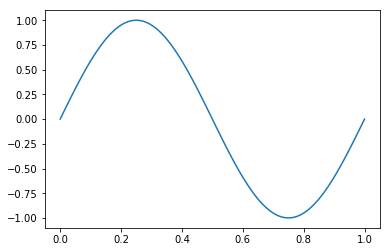

In [10]:
#============================================
# plotting example
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline 

t = np.linspace(0, 1, 100)  # 100 equally spaced array of numbers from 0.0 to 1
y = np.sin(2 * 3.14159 * t)  # take sine of the value

plt.plot(t, y)  # plot them
plt.show()

# Optional: Plotting in Jupyter
There are two scripts in this repository that are examples for plotting repeatedly in matplotlib and also for reading continually from the serial port. Those can be run out of the box as examples. 

However, I thought it would also be interesting to show you how to use a jupyter notebook to perform the same functions. The plotting inside of a notebook, however, is more complicated for beginning python. But if you are feeling adventurous, read on. 

In [7]:
#============================================
# Serial reading example, this examples is essentially unchanged from the 
# script
import serial

serial_port = serial.Serial('/dev/cu.usbmodem1422', 9600, timeout=1)
serial_port.flush()

while True:
    # default behavior is to return a string
    val = serial_port.read(1)
    if val:
        value_as_int = ord(val)
        print(val, type(val), value_as_int)

        if value_as_int >= 30:
            break  # break from the loop

serial_port.close()

b',' <class 'bytes'> 44


<IPython.core.display.Javascript object>


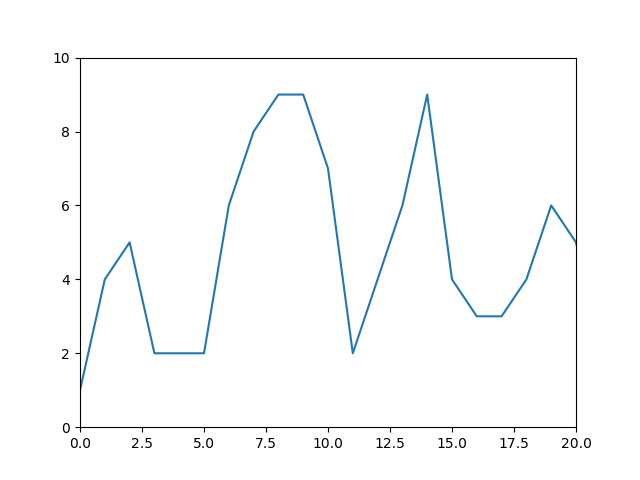

In [ ]:
#============================================
# plotting in real time example

import time  # for sleeping
import random  # for generating random data
from matplotlib import pyplot as plt
from collections import deque
%matplotlib notebook

# create a queue of size N
size_of_queue = 25
init_queue_value = -1
data = deque([init_queue_value] * size_of_queue)

# setup the plot
# show at 0:20 on the x axis and 0:10 on y axis
fig,ax = plt.subplots(1,1)
ax.set_xlim(0, 20)
ax.set_ylim(0, 10)
line, = plt.plot(data)  # get handle to the "line" that we use for updating the plot

# do this until the queue is all filled in
for i in range(0, len(data)):
    # get a random number
    # and add number to the queue
    data.appendleft(random.randint(1, 10))
    data.pop()  # pop the last number off to keep queue size the same

    line.set_ydata(data)  # set the data
    plt.draw()  # and draw it out

    time.sleep(0.2)  # simulate some down time
    fig.canvas.draw()

<IPython.core.display.Javascript object>


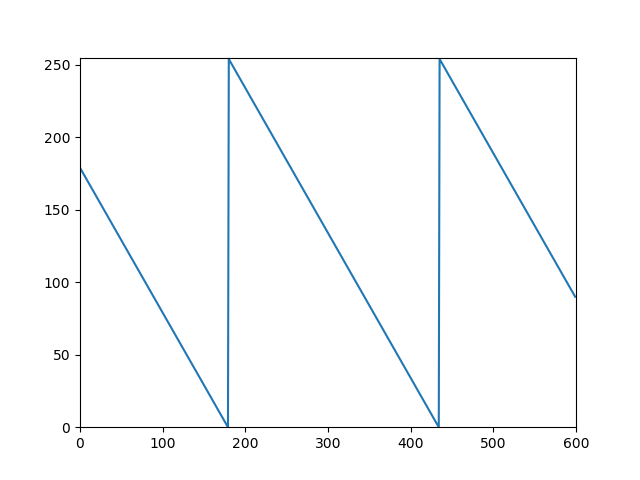

Serial Port found... plotting
Error occurred, possibly Keyboard Interrupt, closing


In [17]:
# in fact, we can even use jupyter with the serial port
#! /usr/bin/python


# python example for plotting in real time

import matplotlib.pyplot as plt  # for plotting
import time  # for sleeping
from collections import deque  # for queueing up data
import serial  # for reading from the port

# define some constants
QUEUE_SIZE = 600
MAX_VALUE_ON_PLOT = 255
FRAMES_PER_SECOND = 25.0

# create a queue of size N
init_queue_value = -1
data = deque([init_queue_value] * QUEUE_SIZE)

# setup the plot axes
fig,ax = plt.subplots(1,1)
ax.set_xlim(0, QUEUE_SIZE)
ax.set_ylim(0, MAX_VALUE_ON_PLOT)
line, = plt.plot(data)  # get handle to the "line" that we use for updating the plot

# try to connect to the serial port
while True:
    try:
        serial_port = serial.Serial('/dev/cu.usbmodem1422', 9600, timeout=1)
        serial_port.flush()
        print ('Serial Port found... plotting')
        break
    except OSError:
        print ('No Serial port, retrying in 1 s...')
        time.sleep(1)


time_last_updated = time.time()
# do this until the queue is all filled in
while True:
    # get a number from serial port
    # and add number to the queue
    try:
        vals = serial_port.read(5)  # consume up some value(s)

        if vals:  # if we actually read something

            # add data to the queue, but keep it the same length
            for val in vals: # pyserial interpretes these as integers
                data.appendleft(val)
                data.pop()  # pop the last number off to keep queue size the same

            # update the graph if the last update was a while ago
            time_now = time.time()
            if (time_now - time_last_updated) > 1.0 / FRAMES_PER_SECOND:  # update at given fps
                time_last_updated = time_now
                line.set_ydata(data)  # set the data
                plt.draw()  # and draw it out
                fig.canvas.draw()  # pause so that the drawing updates


    except serial.serialutil.SerialException:
        # bad read from port, exit this while loop
        print('Serial port not readable (possibly unplugged), closing')
        break
    except:
        print('Error occurred, possibly Keyboard Interrupt, closing')
        break

serial_port.close()